In [ ]:
!pip install pytrends matplotlib seaborn plotly pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

# Setup pytrend library and keyword define

In [99]:
from pytrends.request import TrendReq

# here we can choose the keyword which we need to analys
pytrends = TrendReq(hl='en-US', tz=360)
keyword="cloud computing"

# Data Request

In [83]:
pytrends.build_payload([keyword],cat=0,timeframe='today 12-m',geo='',gprop='')

# Country wise intrest

In [98]:
region_data=pytrends.interest_by_region()
region_data=region_data.sort_values(by=keyword,ascending=False).head(15)


TooManyRequestsError: The request failed: Google returned a response with code 429

<ipython-input-37-8839ece4ab46>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_data[keyword],y=region_data.index,palette="Blues_d")


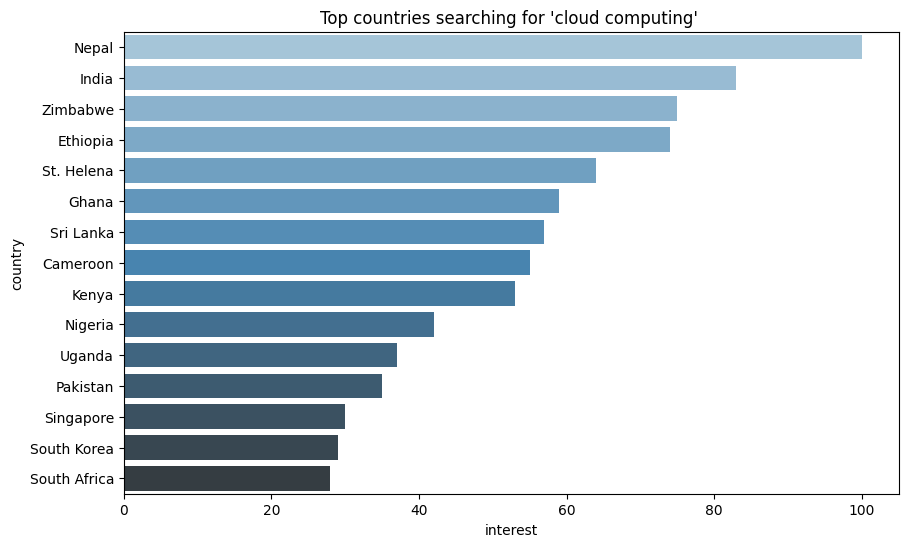

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(x=region_data[keyword],y=region_data.index,palette="Blues_d")
plt.xlabel("interest")
plt.ylabel("country")
plt.title(f"Top countries searching for '{keyword}' ")
plt.show()


# world map

In [38]:
region_data=region_data.reset_index()
fig=px.choropleth(region_data,
                  locations='geoName',
                  locationmode='country names',
                  color=keyword,
                  title=f"Search interest for '{keyword}' by country",
                  color_continuous_scale="Blues")
FIG=fig.update_layout(title_x=0.5)
fig.show()

# Time wise interest

In [39]:
time_df=pytrends.interest_over_time()


/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



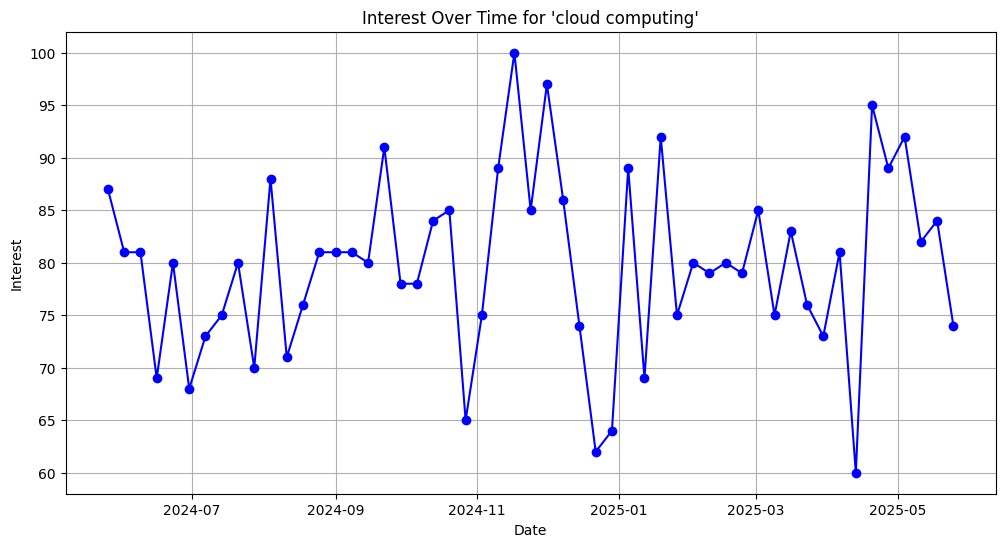

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(time_df.index, time_df[keyword], marker='o', linestyle='-', color='b')
plt.title(f"Interest Over Time for '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid("True")



with the help of figure shown above we can identify the amount of searches occured during a perticular period of time

# Multiple Keyword compare

In [69]:
kw_list={"cloud computing","data science","artificial intelligence"}
pytrends.build_payload(kw_list,cat=0,timeframe='today 12-m',geo='',gprop='')

In [109]:
compare_df=pytrends.interest_over_time()

plt.figure(figsize=(12,6))
for kw in kw_list:
  plt.plot(compare_df.index,compare_df[kw],marker='o',linestyle='-',linewidth=2,label=kw)
plt.title(f"Interest Over Time for Multiple Keywords")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.legend()
plt.show()

KeyError: 'request'